# Описание проекта "Принятие решений в бизнесе"

Мы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

# Описание данных

## Данные для первой части
### Файл `/datasets/hypothesis.csv`. 
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
## Данные для второй части
### Файл `/datasets/orders.csv` 
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.
### Файл `/datasets/visitors.csv`. 
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

# Оглавление

# Загрузка данных

In [3]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, timedelta
import numpy as np
from scipy import stats as st
from math import factorial, sqrt

# зададим стиль по-умолчанию для графиков
plt.style.use('ggplot')

In [4]:
# загружаем CSV-файлы с данными и сохраняем их в датафреймы
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('../datasets/hypothesis.csv')
    orders = pd.read_csv('../datasets/orders.csv')
    visitors = pd.read_csv('../datasets/visitors.csv')

# Предобработка и исследовательский анализ данных

In [5]:
# Зададим функцию для исследовательского анализа данных
def perform_eda(dataframe):
    """
    Perform Exploratory Data Analysis (EDA) on a pandas DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame to be analyzed.
    """
    
    # Basic Information
    print("Basic Information:")
    display(dataframe.head())
    display(dataframe.info())
    
    # Summary Statistics for Numerical Columns
    print("\nSummary Statistics for Numerical Columns:")
    display(dataframe.describe())
    
    # Summary Statistics for Categorical Columns
    print("\nSummary Statistics for Categorical Columns:")
    display(dataframe.describe(include='object'))
    
    # Missing Values
    print("\nMissing Values:")
    missing_values = dataframe.isnull().sum()
    missing_percentage = (missing_values / len(dataframe)) * 100
    missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    display(missing_info)
    
    # Duplicated Rows
    print("\nDuplicated Rows:")
    duplicated_rows = dataframe[dataframe.duplicated()]
    display(duplicated_rows)
    
    # Data Types
    print("\nData Types:")
    display(dataframe.dtypes)
    
    # Unique Value Counts for Categorical Columns
    print("\nUnique Value Counts for Categorical Columns:")
    categorical_columns = dataframe.select_dtypes(include='object').columns
    for column in categorical_columns:
        unique_counts = dataframe[column].value_counts()
        if len(unique_counts) <= 10:
            print(f"{column}:\n")
            display(unique_counts)
    
    # Data Visualization
    print("\nData Visualization:")
    numerical_columns = dataframe.select_dtypes(include=np.number).columns
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(dataframe[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

# Example usage:
# Replace 'your_dataframe' with your actual DataFrame variable
# perform_eda(your_dataframe)

Basic Information:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None


Summary Statistics for Numerical Columns:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000



Summary Statistics for Categorical Columns:


,Hypothesis
count,9
unique,9
top,"Добавить два новых канала привлечения трафика,..."
freq,1



Missing Values:


,Missing Values,Percentage
Hypothesis,0,0.0
Reach,0,0.0
Impact,0,0.0
Confidence,0,0.0
Efforts,0,0.0



Duplicated Rows:


,Hypothesis,Reach,Impact,Confidence,Efforts



Data Types:


Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Efforts        int64
dtype: object


Unique Value Counts for Categorical Columns:
Hypothesis:



Hypothesis
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                      


Data Visualization:


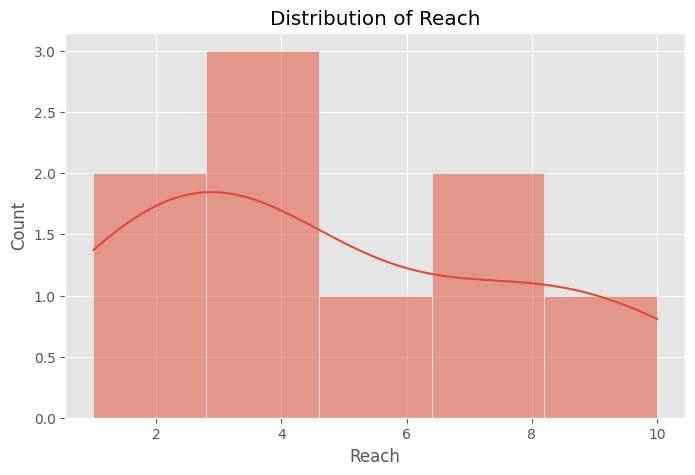

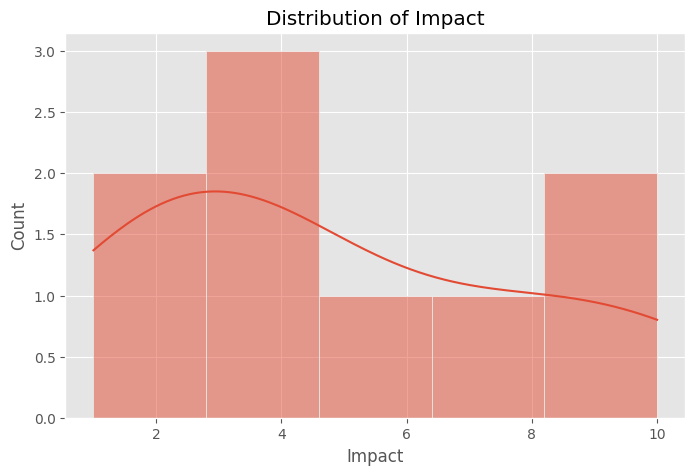

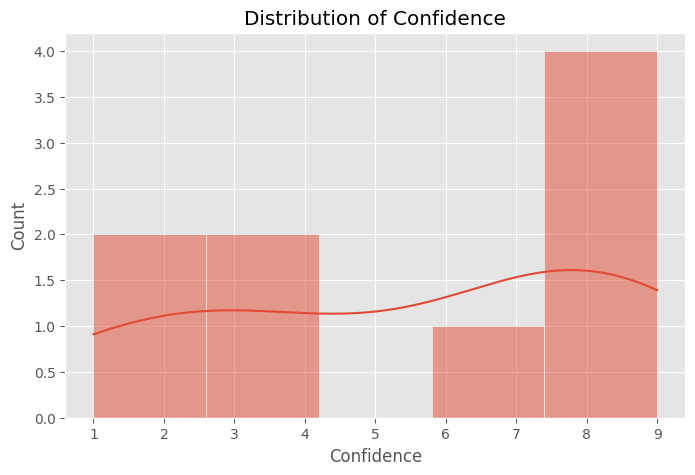

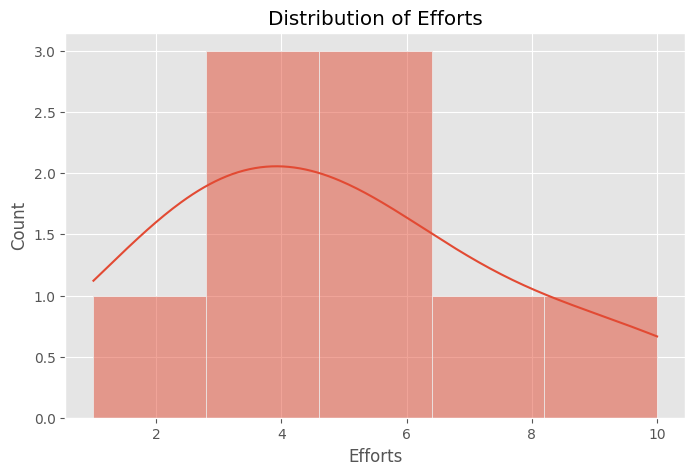

In [6]:
perform_eda(hypothesis)

Basic Information:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None


Summary Statistics for Numerical Columns:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



Summary Statistics for Categorical Columns:


,date,group
count,62,62
unique,31,2
top,2019-08-01,A
freq,2,31



Missing Values:


,Missing Values,Percentage
date,0,0.0
group,0,0.0
visitors,0,0.0



Duplicated Rows:


,date,group,visitors



Data Types:


date        object
group       object
visitors     int64
dtype: object


Unique Value Counts for Categorical Columns:
group:



group
A    31
B    31
Name: count, dtype: int64


Data Visualization:


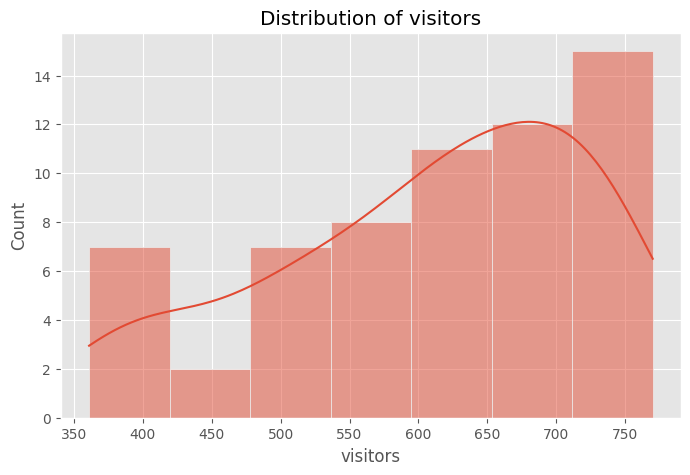

In [7]:
perform_eda(visitors)

Basic Information:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None


Summary Statistics for Numerical Columns:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06



Summary Statistics for Categorical Columns:


,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640



Missing Values:


,Missing Values,Percentage
transactionId,0,0.0
visitorId,0,0.0
date,0,0.0
revenue,0,0.0
group,0,0.0



Duplicated Rows:


,transactionId,visitorId,date,revenue,group



Data Types:


transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object


Unique Value Counts for Categorical Columns:
group:



group
B    640
A    557
Name: count, dtype: int64


Data Visualization:


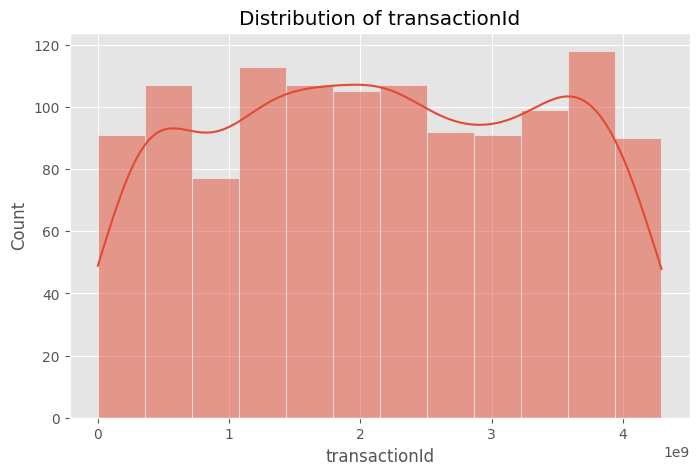

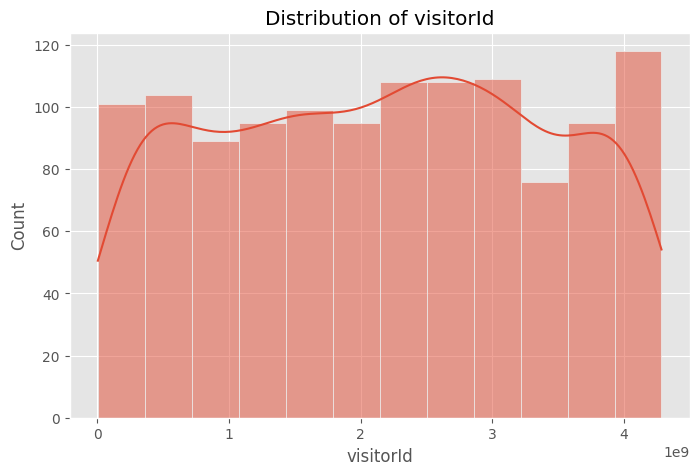

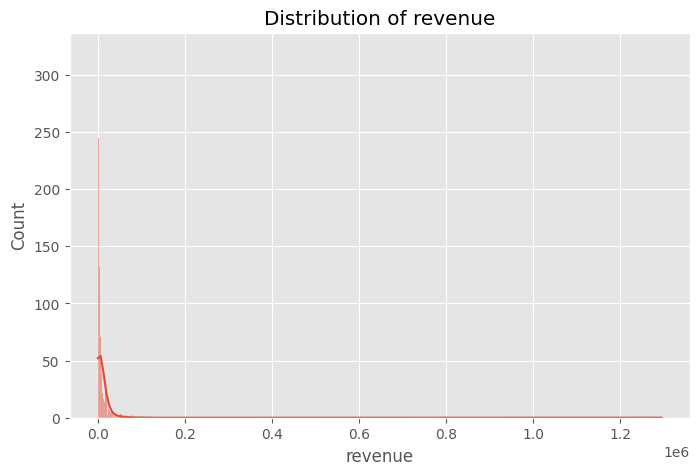

In [8]:
perform_eda(orders)

# Часть 1

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

# Часть 2

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

# Выводы